## About Aerofit-
Aerofit is India's leading fitness equipment brand that manufactures residential and commercial fitness machines including treadmills, elliptical trainers, etc.

### Problem Statement/Aim-
Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 

### About the Data provided
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in \$)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week

Product Portfolio:
- The KP281 is an entry-level treadmill that sells for \$ 1500
- The KP481 is for mid-level runners that sell for \$ 1750
- The KP781 treadmill is having advanced features that sell for \$2500

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df=pd.read_csv('aerofit_treadmill.csv')
raw_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
raw_df.shape

(180, 9)

In [4]:
raw_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
raw_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [6]:
raw_df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Observations:
- There are no missing values
- There are 3 unique products where KP281 is the most frequent product.
- Minimum & Maximum age of the person is 18 & 50, and 75% of persons have age less than or equal to 33.
- 75% of persons are having education <= 16 years.
- Out of 180 data points, 104's gender is Male and rest are the female.
- Standard deviation for Income & Miles is very high and also mean and median have lot of difference. These variables might have the outliers in it.
- 3 cols are categorical- Product, Gender, Marital Status and rest are numeric/quantative cols

### Unique attributes and Value counts

In [7]:
raw_df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [8]:
raw_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Given the Product Portfolio:

- The KP281 is an entry-level treadmill that sells for 1500dollars :the highest sales.
- The KP481 is for mid-level runners that sell for 1750dollars : 2nd highest sales
- The KP781 treadmill is having advanced features that sell for 2500dollars : it makes sense that expensive one was sold the least

In [9]:
raw_df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [10]:
104*100/180

57.77777777777778

57.7% of males bought AeroFit treadmill product

In [11]:
raw_df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [12]:
 107*100/180

59.44444444444444

Almost 60% of partnered people bought AeroFit treadmill product

### Visual Analysis

#### 1. For categorical variables

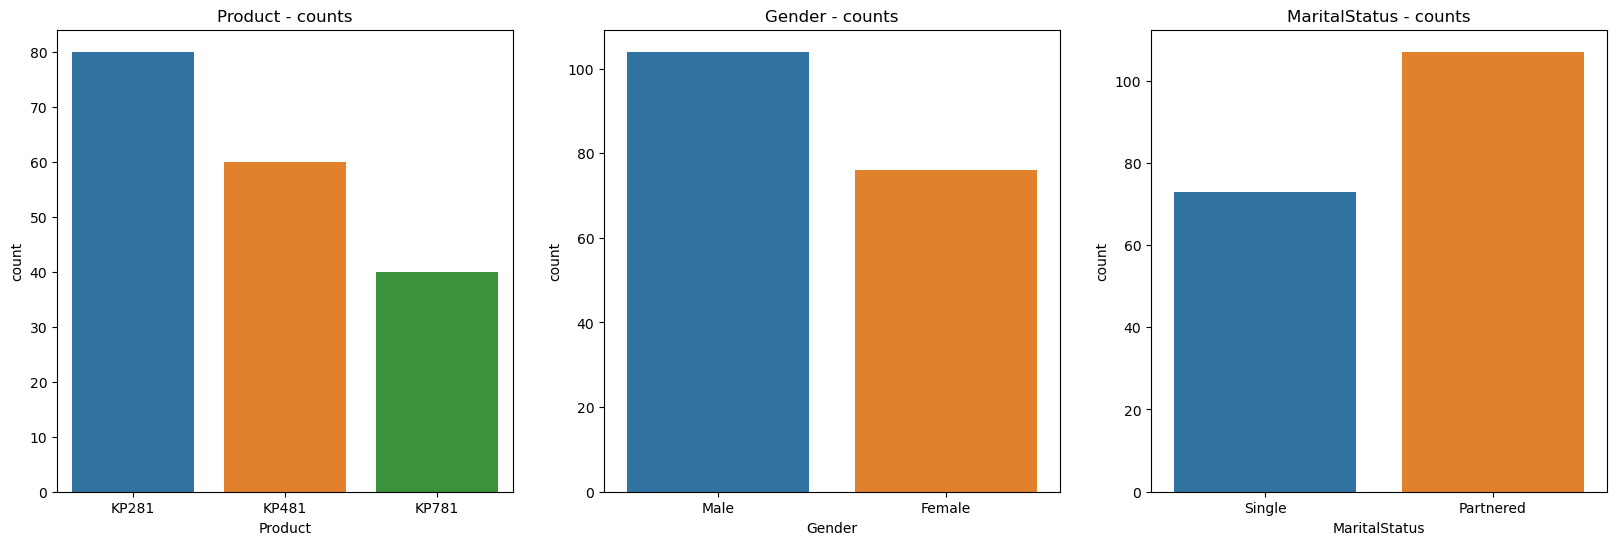

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=raw_df, x='Product', ax=axs[0])
sns.countplot(data=raw_df, x='Gender', ax=axs[1])
sns.countplot(data=raw_df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts")
axs[1].set_title("Gender - counts")
axs[2].set_title("MaritalStatus - counts")
plt.show()

#### 2. For finding outliers

In [14]:
raw_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

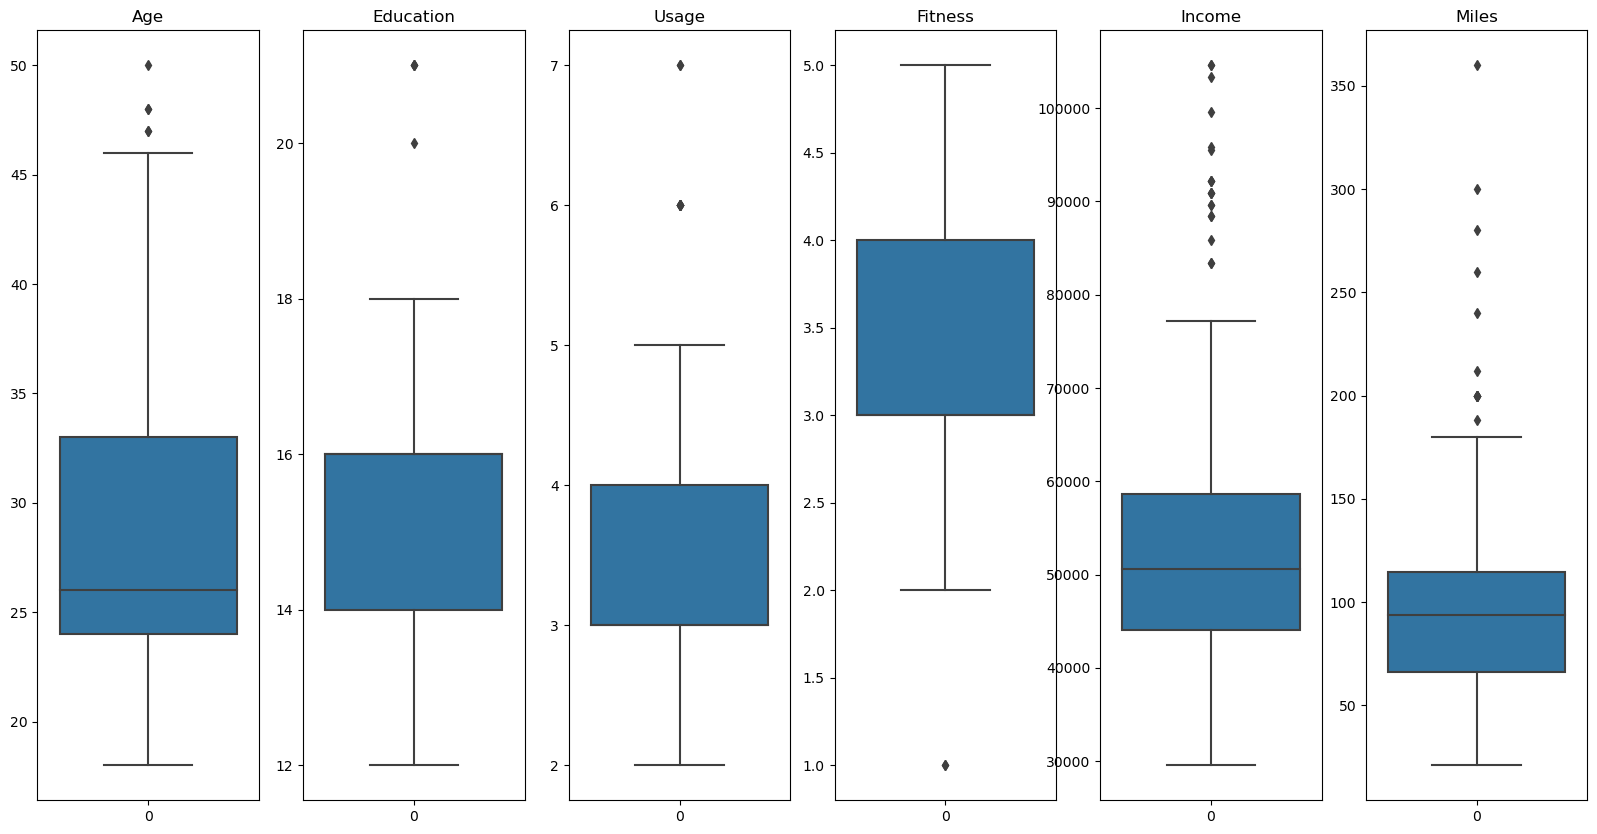

In [15]:
numeric_cols=['Age', 'Education',  'Usage',
       'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(ncols=6, figsize=(20, 10))
for i in range(len(numeric_cols)): 
    sns.boxplot(data=raw_df[numeric_cols[i]], ax=axs[i]).set(title=numeric_cols[i])

plt.show()

Observation - Age, Education and Usage are having very few outliers.
While Income and Miles are having more outliers.

#### 3. Check data distribution for numeric/quantative cols

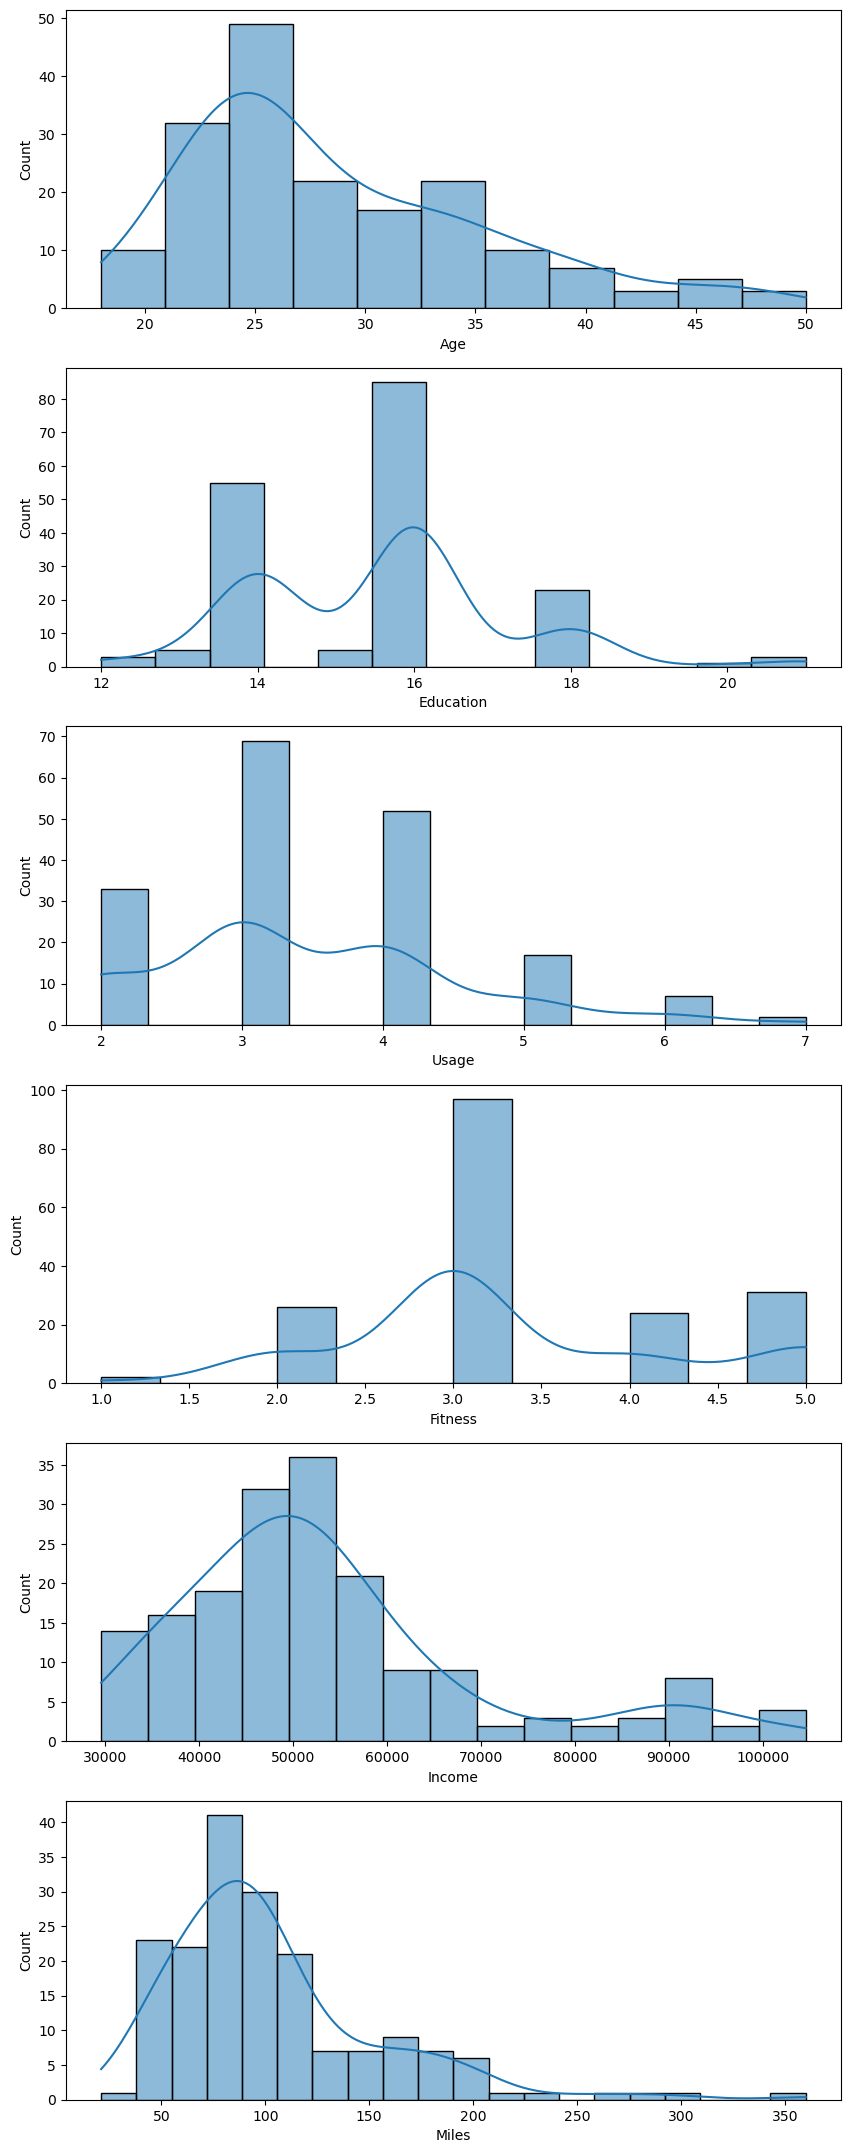

In [16]:
numeric_cols=['Age', 'Education',  'Usage',
       'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=6, figsize=(10, 10))
fig.subplots_adjust(top=2.2)
for i in range(len(numeric_cols)): 
    sns.histplot(data=raw_df[numeric_cols[i]], ax=axs[i],kde=True)

plt.show()

#### Observations-
- Miles, Income are right skewed graphs ie most left data heavy graphs
- More customers in age of 18-30 are willing to buy treadmill more
- Very few people run more than 180miles
- People with income more than $40K are buying more 


### Check correlation b/w numeric variables

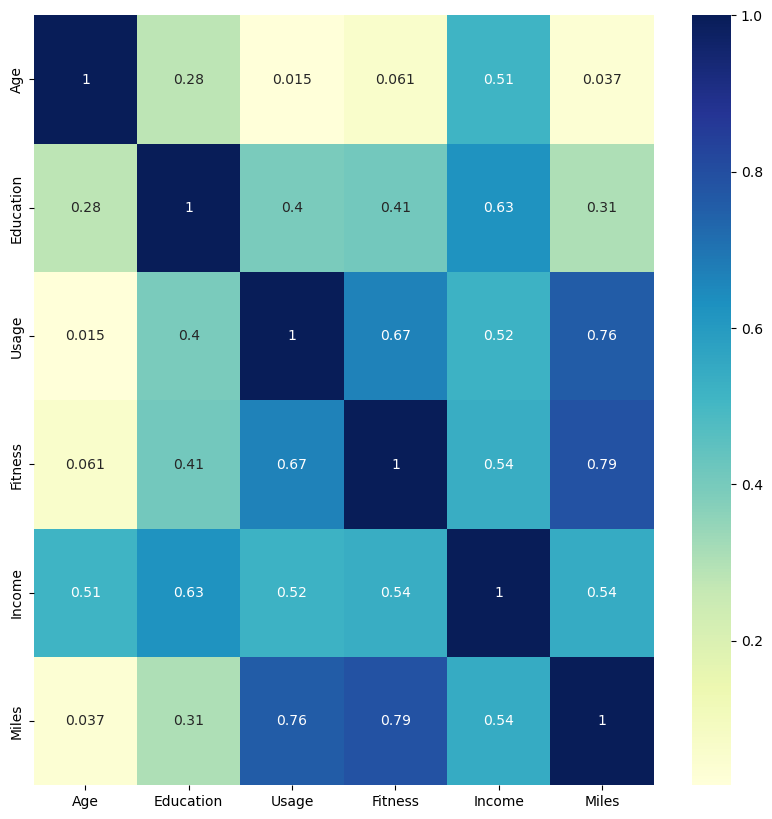

In [17]:
plt.figure(figsize = (10, 10))
sns.heatmap(raw_df.corr(), annot=True,  cmap="YlGnBu") 
plt.show()

Observation-
- Miles and Fitness are highly correlated. This makes sense as if customer fitness is high more treadmill they would want to use
- Hence high correlation is with 'Fitness and Usage' and 'Usage and fitness' that customer usage is higher when fitness is high and more people tend to buy
- Education and income have high correlation which means higher yrs of education have resulted them to get better jobs

### Analysis based for each product type

<AxesSubplot:xlabel='Age', ylabel='Income'>

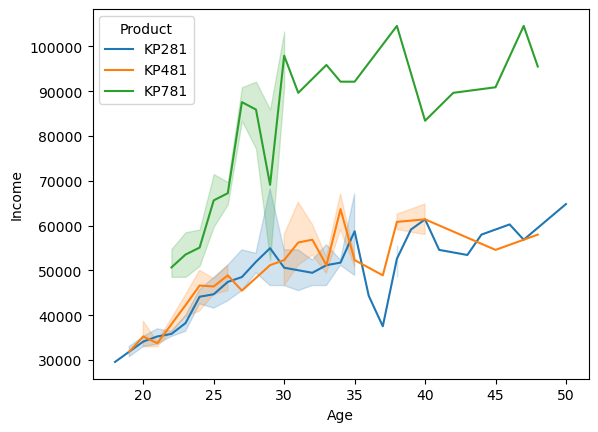

In [18]:
sns.lineplot(x='Age',y='Income',data=raw_df,hue='Product')

<AxesSubplot:xlabel='Gender', ylabel='Income'>

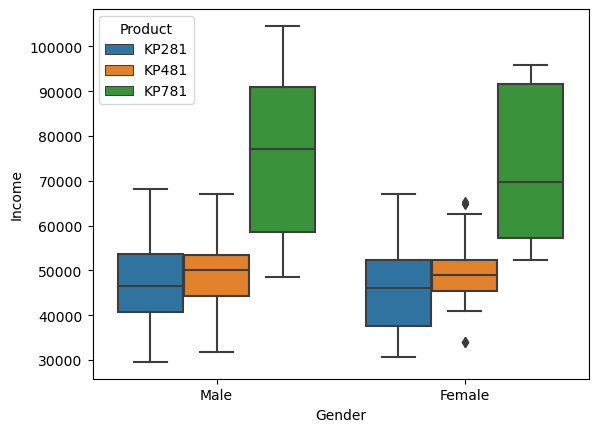

In [19]:
sns.boxplot(x='Gender',y='Income',data=raw_df,hue='Product')

#### Convert numerical to  categorical column
1. Age- Derive into Age_groups
2. Income- Derive into Income groups


In [20]:
raw_df['age_group']=pd.cut(x=raw_df['Age'],
                           bins=[0,18,28,38,48,58,68,100],
                           labels=['0-18','19-28','29-38','39-48','49-58','59-68','69-100'])
raw_df['age_group'].value_counts()

19-28     106
29-38      55
39-48      17
0-18        1
49-58       1
59-68       0
69-100      0
Name: age_group, dtype: int64

In [21]:
raw_df['age_group'].value_counts().sum()

180

In [25]:
raw_df['income_group']=pd.cut(x=raw_df['Income'],
                           bins=[10000,30000,60000,80000,105000],
                           labels=['Lower income','Lower Middle income','Upper Middle income','Higher income'])
raw_df['income_group'].value_counts()

Lower Middle income    137
Upper Middle income     23
Higher income           19
Lower income             1
Name: income_group, dtype: int64

In [27]:
raw_df['income_group'].value_counts().sum()

180

##### Distribution across Age and income groups for each product type

<AxesSubplot:xlabel='age_group', ylabel='count'>

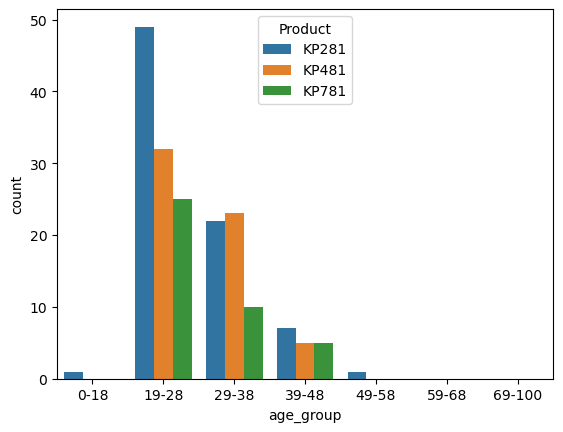

In [28]:
sns.countplot(data=raw_df,x='age_group', hue='Product')

<AxesSubplot:xlabel='income_group', ylabel='count'>

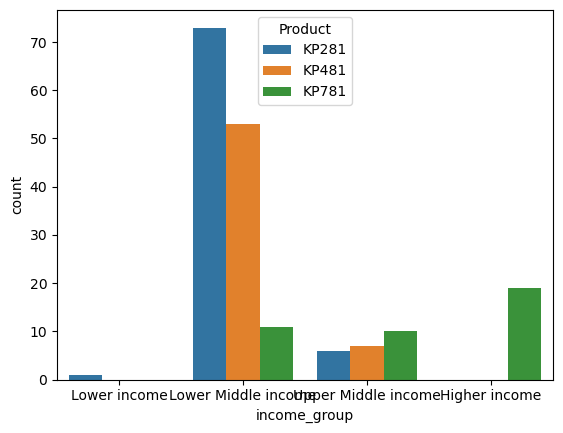

In [29]:
sns.countplot(data=raw_df,x='income_group', hue='Product')

#### Observation-
1. Customers in the age group of 39 to 40 tend to buy higher end product 'KP781', but fewer in number. Also upper middle or higher income customers tend to buy higher end product. So business can target these segment people to sell these more.
2. Lower Middle income customers tend to buy KP281 product more and mostly they tend to be in age group of 19-28.

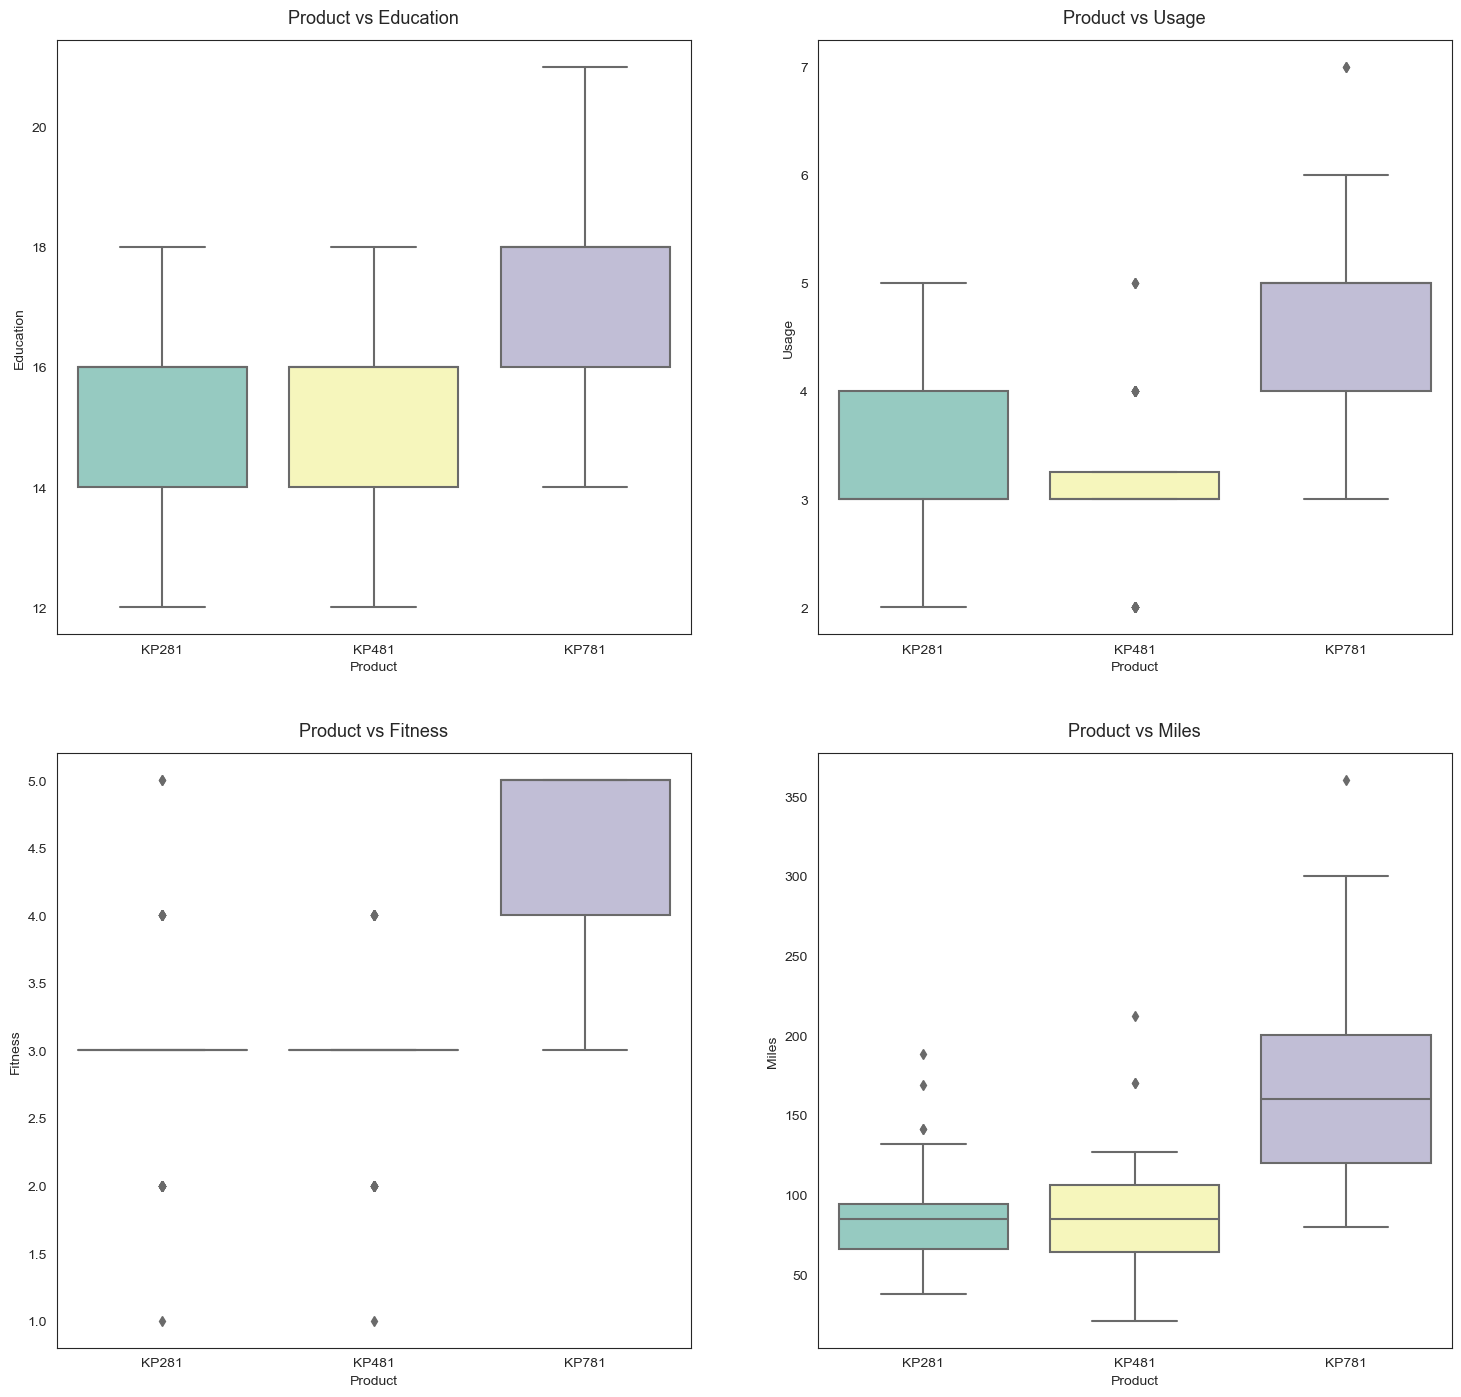

In [30]:
attrs = [ 'Education', 'Usage', 'Fitness', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=raw_df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Observations-
1. Product vs Education
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

2. Customers who are planning to use the treadmill greater than 4 times a week, are more likely to buy the KP781 product.
While the other customers are likely to purchasing KP281 or KP481
3. Chances of buying higher end product like KP781 if customers are more fit
4. Customers who run/plan to more miles are likely to buy KP781, than the ones who don't.

### Analysis using Contingency Tables to Calculate Probabilities (Marginal Probabilities,  Conditional Probabilities)
- Product - Income group
- Product - Gender
- Product - Marital Status

In [31]:
raw_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,income_group
0,KP281,18,Male,14,Single,3,4,29562,112,0-18,Lower income
1,KP281,19,Male,15,Single,2,3,31836,75,19-28,Lower Middle income
2,KP281,19,Female,14,Partnered,4,3,30699,66,19-28,Lower Middle income
3,KP281,19,Male,12,Single,3,3,32973,85,19-28,Lower Middle income
4,KP281,20,Male,13,Partnered,4,2,35247,47,19-28,Lower Middle income


In [40]:
ct_income_prod=pd.crosstab( raw_df.Product,raw_df.income_group)
ct_income_prod

income_group,Lower income,Lower Middle income,Upper Middle income,Higher income
Product,,,,
KP281,1,73,6,0
KP481,0,53,7,0
KP781,0,11,10,19


In [49]:
ct_gender_prod=pd.crosstab( raw_df.Product,raw_df.Gender)
ct_gender_prod

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [50]:
ct_maritalstatus_prod=pd.crosstab( raw_df.Product,raw_df.MaritalStatus)
ct_maritalstatus_prod

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


-> Marginal probability

In [45]:
## What is the probability of a each income group customer buying a treadmill?  
for col in ct_income_prod.columns:
    print("P(",col,"):", ct_income_prod[col].sum()*100/sum(ct_income_prod.sum()))

P( Lower income ): 0.5555555555555556
P( Lower Middle income ): 76.11111111111111
P( Upper Middle income ): 12.777777777777779
P( Higher income ): 10.555555555555555


In [52]:
## What is the probability of each gender customer buying a treadmill?
for col in ct_gender_prod.columns:
    print("P(",col,"):", ct_gender_prod[col].sum()*100/sum(ct_gender_prod.sum()))

P( Female ): 42.22222222222222
P( Male ): 57.77777777777778


In [54]:
## What is the probability based on maritalstatus of customer of buying a treadmill?
for col in ct_maritalstatus_prod.columns:
    print("P(",col,"):", ct_maritalstatus_prod[col].sum()*100/sum(ct_maritalstatus_prod.sum()))

P( Partnered ): 59.44444444444444
P( Single ): 40.55555555555556


### Conditional probability - what is the probability of each customer segment to buy certain product given its that product

In [66]:
for i in raw_df.Product.unique():
    for j in raw_df.income_group.unique():
        print('P(',j,'|',i,'):',len(raw_df[(raw_df['income_group']==j) & (raw_df['Product']==i)])/len(raw_df[raw_df['Product']==i]))


P( Lower income | KP281 ): 0.0125
P( Lower Middle income | KP281 ): 0.9125
P( Upper Middle income | KP281 ): 0.075
P( Higher income | KP281 ): 0.0
P( Lower income | KP481 ): 0.0
P( Lower Middle income | KP481 ): 0.8833333333333333
P( Upper Middle income | KP481 ): 0.11666666666666667
P( Higher income | KP481 ): 0.0
P( Lower income | KP781 ): 0.0
P( Lower Middle income | KP781 ): 0.275
P( Upper Middle income | KP781 ): 0.25
P( Higher income | KP781 ): 0.475


#### Observation-
- 91% and 88% of Lower middle class income customers buy KP281 and KP481 treadmill models respectively
- Around 50% of Higher income class customers have probability to buy KP781 treadmill

In [64]:
## What is the probability of a male customer buying a KP781 treadmill? 
for i in raw_df.Product.unique():
    for j in raw_df.Gender.unique():
        print('P(',j,'|',i,'):',len(raw_df[(raw_df['Gender']==j) & (raw_df['Product']==i)])/len(raw_df[raw_df['Product']==i]))


P( Male | KP281 ): 0.5
P( Female | KP281 ): 0.5
P( Male | KP481 ): 0.5166666666666667
P( Female | KP481 ): 0.48333333333333334
P( Male | KP781 ): 0.825
P( Female | KP781 ): 0.175


#### Observation-
- There is equal probability of male and female customers to buy KP281, while slightly higher chances of male customers buying KP481 treadmill models
- 82% of male customers has chances to buy KP781 treadmill

In [67]:
for i in raw_df.Product.unique():
    for j in raw_df.MaritalStatus.unique():
        print('P(',j,'|',i,'):',len(raw_df[(raw_df['MaritalStatus']==j) & (raw_df['Product']==i)])/len(raw_df[raw_df['Product']==i]))


P( Single | KP281 ): 0.4
P( Partnered | KP281 ): 0.6
P( Single | KP481 ): 0.4
P( Partnered | KP481 ): 0.6
P( Single | KP781 ): 0.425
P( Partnered | KP781 ): 0.575


#### Observation-
- There is 60% higher probability of Partnered customers to buy KP281 and KP481 treadmill models
- 57% of Partnered customers has higher chances to buy KP781 treadmill model

### Recommendations

- KP281 model is sold the most so Aerofit should focus on targetting customers buying these. These people include in age group 
of 18-28 and those who have lower middle income(People with income more than \$40K)
- For KP481 model, we should focus on Lower middle class income customers who are partnered 
- For KP781 model, we should focus on higher income group male customers(i.e earning more than \$80K) and people with good fitness levels
- Also be it any product, we should try selling more treadmills to FIT people who self-rate themselves greater than 3, as we see a correlation that more fit a person is higher number of miles they would want to run on treadmill